In [1]:
import pandas as pd
from sklearn.preprocessing import MaxAbsScaler

In [15]:
baredf = pd.read_csv("../data7s/cic/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv")

In [16]:
baredf = baredf.drop(columns=['Timestamp'])
baredf.Label = baredf.apply( lambda x: 0 if x.Label == 'Benign' else 1, axis=1)
for a in baredf.columns:
    if (baredf[a].mean() == 0):
        baredf = baredf.drop(columns=[a])

In [17]:
ben = baredf[baredf['Label'] == 0]
att = baredf[baredf['Label'] != 0]

In [18]:
for a in baredf.columns:
  print(f"geral: {baredf[a].mean()}, ataque: {att[a].mean()}, benegin: {ben[a].mean()}  {a}")

geral: 19587.641002312663, ataque: 80.0, benegin: 56768.89670290689  Dst Port
geral: 6.037951505614763, ataque: 6.027670260068456, benegin: 6.0575473972724225  Protocol
geral: 399040.09894189733, ataque: 301537.04789295985, benegin: 584879.3745472282  Flow Duration
geral: 196.80991726867416, ataque: 297.4280267891157, benegin: 5.033389407288136  Tot Fwd Pkts
geral: 1.30966311422645, ataque: 0.9523920307324549, benegin: 1.9906161576130785  Tot Bwd Pkts
geral: 6563.580835896336, ataque: 9517.458638559227, benegin: 933.5363894100595  TotLen Fwd Pkts
geral: 248.65272965691534, ataque: 222.62163718371133, benegin: 298.26758084764975  TotLen Bwd Pkts
geral: 366.69379395846744, ataque: 71.30042225136752, benegin: 929.7088958049845  Fwd Pkt Len Max
geral: 0.2549479054907851, ataque: 0.08049530201732627, benegin: 0.5874518128885108  Fwd Pkt Len Min
geral: 79.7714432745739, ataque: 23.820470951559045, benegin: 186.41311298708604  Fwd Pkt Len Mean
geral: 169.95185724751448, ataque: 41.11884399594

In [19]:
for a in baredf.columns:
    if ((abs(att[a].mean()-ben[a].mean())) <= (att[a].mean()*0.3)):
        print(a)

Protocol
Fwd Seg Size Min


In [20]:
for a in baredf.columns:
    if ((abs(att[a].mean()-ben[a].mean())) <= (att[a].mean()*0.3)):
        baredf = baredf.drop(columns=[a])

In [21]:
baredf = pd.DataFrame(MaxAbsScaler().fit_transform(baredf))

In [39]:
baredf.to_csv('cicClean.csv', index=False)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import auc, roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

In [25]:
baredf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,66
0,0.001221,0.000316,0.000016,0.024194,0.000014,0.013924,0.060701,0.000000,0.027664,0.087481,...,0.000003,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.007630,0.979779,0.000010,0.000000,0.000151,0.000000,0.224820,0.512295,0.512295,0.000000,...,0.000006,0.000000,0.0,0.000000,0.000000,0.554717,0.473161,0.713208,0.396226,0.0
2,0.007630,0.979779,0.000010,0.000000,0.000151,0.000000,0.224820,0.512295,0.512295,0.000000,...,0.000006,0.000000,0.0,0.000000,0.000000,0.554717,0.473161,0.713208,0.396226,0.0
3,0.007630,0.831200,0.000016,0.000000,0.000252,0.000000,0.224820,0.512295,0.512295,0.000000,...,0.000013,0.200015,0.0,0.142868,0.200015,0.300943,0.753479,0.713208,0.067928,0.0
4,0.007630,0.831200,0.000016,0.000000,0.000252,0.000000,0.224820,0.512295,0.512295,0.000000,...,0.000013,0.200014,0.0,0.142867,0.200014,0.300943,0.753479,0.713208,0.067928,0.0


In [27]:
x=baredf.iloc[:,:-1]
y=baredf[66]

In [28]:
treinoX, testeX, treinoY, testey = train_test_split(x, y, train_size=0.7, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(treinoX, treinoY)
knnPred = knn.predict(testeX)
accuracy_score(testey, knnPred)

In [40]:
dt = DecisionTreeClassifier(min_samples_split=10)
dt.fit(treinoX, treinoY)
dtPred = dt.predict(testeX)
accuracy_score(testey, dtPred)

0.9999904632628992

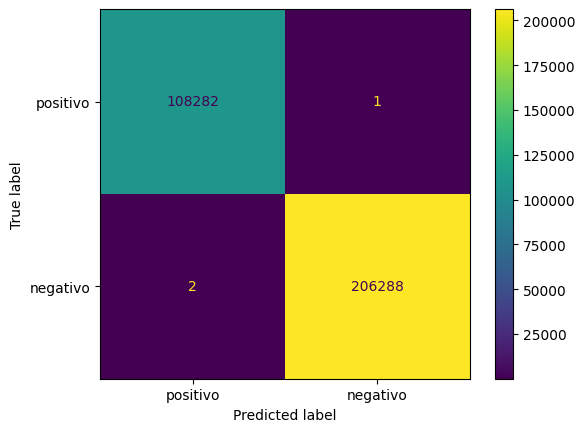

In [41]:
dtmc = confusion_matrix(testey, dtPred)
ConfusionMatrixDisplay(dtmc, display_labels=['positivo', 'negativo']).plot()

In [35]:
etc = ExtraTreesClassifier(criterion="entropy", verbose=1)
etcModel = etc.fit(treinoX, treinoY)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   11.5s


In [36]:
etcPred = etcModel.predict(testeX)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.1s


In [37]:
accuracy_score(etcPred, testey)

1.0

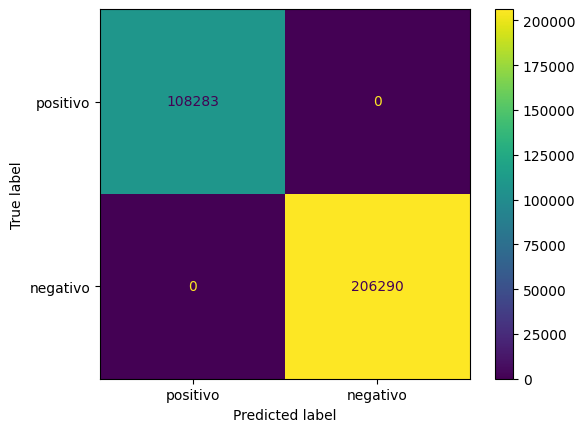

In [38]:
etcmc = confusion_matrix(testey, etcPred)
ConfusionMatrixDisplay(etcmc, display_labels=['positivo', 'negativo']).plot()